# Prediksi Kelulusan Siswa Berdasarkan Jam Belajar dan Tidur

Dalam analisis ini, kita akan memprediksi apakah seorang siswa akan lulus atau tidak berdasarkan dua variabel penting:
1. Jumlah jam belajar.
2. Jumlah jam tidur.

Kami akan menggunakan dua algoritma:
- K-Nearest Neighbors (KNN)
- Logistic Regression

Setelah itu, kami akan mengevaluasi performa masing-masing model.


In [10]:
# 1. Mengimpor Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## Membuat Dataset Sederhana

Dataset ini mencakup data jam belajar dan jam tidur dari beberapa siswa, serta status apakah mereka lulus atau tidak.


In [11]:
# 2. Membuat dataset sederhana
data = {
    'jam_belajar': [2, 3, 4, 5, 6, 7, 8, 2, 4, 6, 3, 5, 7, 9],
    'jam_tidur': [8, 7, 6, 5, 4, 6, 8, 5, 4, 5, 7, 6, 8, 5],
    'lulus': [0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]
}

# Membuat DataFrame
df = pd.DataFrame(data)
df.head()


,jam_belajar,jam_tidur,lulus
0,2,8,0
1,3,7,0
2,4,6,0
3,5,5,1
4,6,4,1


## Visualisasi Data

Kami akan membuat scatter plot untuk melihat hubungan antara jam belajar, jam tidur, dan status kelulusan.


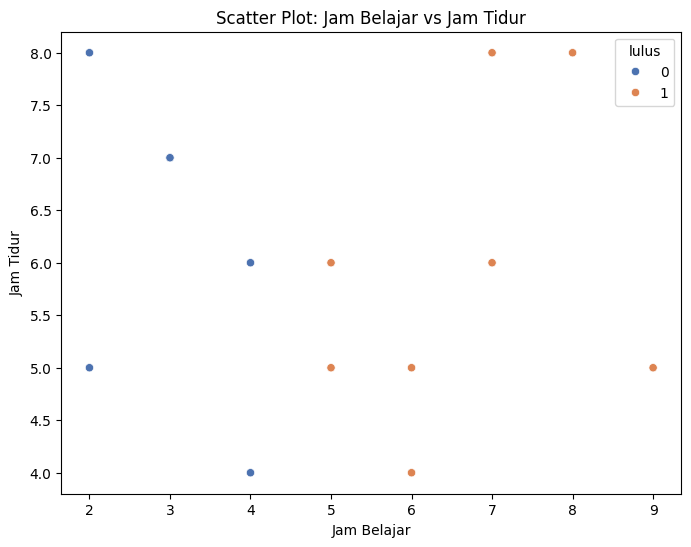

In [12]:
# 3. Visualisasi Data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='jam_belajar', y='jam_tidur', hue='lulus', data=df, palette='deep')
plt.title('Scatter Plot: Jam Belajar vs Jam Tidur')
plt.xlabel('Jam Belajar')
plt.ylabel('Jam Tidur')
plt.show()


## Pemrosesan Data dan Pembagian Dataset

Sekarang, kami akan membagi dataset menjadi data latih dan data uji, serta melakukan standarisasi fitur.


In [13]:
# 4. Pemrosesan Data
X = df[['jam_belajar', 'jam_tidur']]  # Fitur
y = df['lulus']  # Label

# Membagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Pelatihan Model KNN

Kami akan melatih model **K-Nearest Neighbors (KNN)** untuk memprediksi apakah siswa lulus atau tidak.


In [14]:
# 5. Pelatihan Model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


## Pelatihan Model Logistic Regression

Kami juga melatih model **Logistic Regression** untuk membandingkan hasil prediksinya dengan KNN.


In [15]:
# 6. Pelatihan Model Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


## Evaluasi Model

Kami akan mengevaluasi performa kedua model berdasarkan akurasi dan laporan klasifikasi.


In [16]:
# 7. Evaluasi Model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


KNN Accuracy: 0.6
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5

Logistic Regression Accuracy: 0.8
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



## Visualisasi Hasil Prediksi KNN

Berikut adalah scatter plot dari hasil prediksi model KNN.


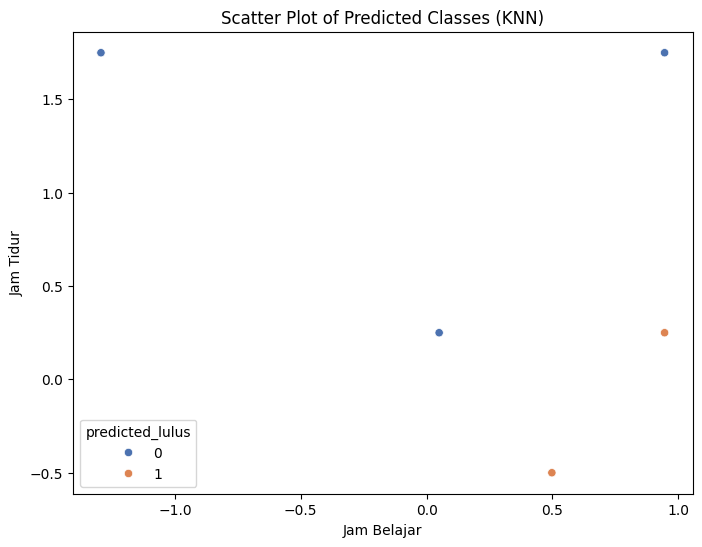

In [17]:
# 8. Visualisasi Hasil Prediksi (Opsional)
# Membuat DataFrame untuk prediksi hasil KNN
predicted_classes = pd.DataFrame(X_test, columns=['jam_belajar', 'jam_tidur'])
predicted_classes['predicted_lulus'] = y_pred_knn

# Scatter plot untuk hasil prediksi
plt.figure(figsize=(8, 6))
sns.scatterplot(x='jam_belajar', y='jam_tidur', hue='predicted_lulus', data=predicted_classes, palette='deep')
plt.title('Scatter Plot of Predicted Classes (KNN)')
plt.xlabel('Jam Belajar')
plt.ylabel('Jam Tidur')
plt.show()


## Penjelasan Hasil Visualisasi Data Asli

- **Sumbu X (Jam Belajar)**: Menunjukkan jumlah jam yang dihabiskan siswa untuk belajar.
- **Sumbu Y (Jam Tidur)**: Menunjukkan jumlah jam tidur siswa.
- **Warna Titik**:
  - **Biru**: Menunjukkan siswa **tidak lulus** ujian.
  - **Oranye**: Menunjukkan siswa **lulus** ujian.

Dari scatter plot ini, kita dapat mengamati beberapa pola penting:
1. Siswa yang **menghabiskan lebih banyak waktu untuk belajar** (biasanya di atas 5 jam) cenderung lebih mungkin untuk **lulus ujian** (ditandai dengan warna oranye).
2. Siswa yang **jam belajarnya rendah** (di bawah 5 jam) cenderung **tidak lulus** ujian (ditandai dengan warna biru), terutama jika jam tidurnya juga tidak optimal.
3. Terdapat keseimbangan yang tampaknya berpengaruh antara **jumlah jam belajar dan jam tidur**. Siswa yang belajar lebih banyak namun tidak tidur terlalu sedikit atau terlalu banyak cenderung memiliki hasil yang lebih baik.

Secara umum, kita dapat melihat bahwa kombinasi antara **jam belajar** dan **jam tidur** memiliki hubungan yang jelas dengan kelulusan siswa.


## Penjelasan Hasil Visualisasi Prediksi KNN

- **Sumbu X (Jam Belajar)**: Jumlah jam belajar siswa.
- **Sumbu Y (Jam Tidur)**: Jumlah jam tidur siswa.
- **Warna Titik**: Mewakili hasil prediksi model KNN tentang apakah siswa lulus atau tidak lulus.
  - **Biru**: Model memprediksi siswa **tidak lulus**.
  - **Oranye**: Model memprediksi siswa **lulus**.

Dari visualisasi hasil prediksi ini, kita dapat mengamati:
1. Jika pola warna prediksi **mirip dengan pola data asli**, maka model KNN berhasil memprediksi dengan baik.
2. Jika ada **titik-titik yang berbeda warnanya dari data asli**, itu berarti model membuat kesalahan prediksi.

Secara keseluruhan, visualisasi ini membantu kita memahami seberapa baik model KNN bekerja dalam memprediksi apakah siswa akan lulus berdasarkan jam belajar dan jam tidur. Hasil prediksi model ini bisa kita bandingkan dengan visualisasi data asli untuk mengevaluasi akurasi model.
